In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
X_train.shape , y_train.shape , X_test.shape, y_test.shape

169017344/169001437 [==============================] - 3s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
class_names=['apple','aquarium_fish','baby','bear','beaver','bed','bee','beetle','bicycle','bottle','bowl','boy','bridge','bus','butterfly','camel','can','castle','caterpillar','cattle','chair','chimpanzee','clock','cloud','cockroach','couch','crab','crocodile','cup','dinosaur','dolphin','elephant','flatfish','forest','fox','girl','hamster','house','kangaroo','keyboard','lamp','lawn_mower','leopard','lion','lizard','lobster','man','maple_tree','motorcycle','mountain','mouse','mushroom','oak_tree','orange','orchid','otter','palm_tree','pear','pickup_truck','pine_tree','plain','plate','poppy','porcupine','possum','rabbit','raccoon','ray','road','rocket','rose','sea','seal','shark','shrew','skunk','skyscraper','snail','snake','spider','squirrel','streetcar','sunflower','sweet_pepper','table','tank','telephone','television','tiger','tractor','train','trout','tulip','turtle','wardrobe','whale','willow_tree','wolf','woman','worm']


In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [6]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [7]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [12]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(32, 32, 3), padding='same',activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [13]:
model.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
model_path = 'best-cifar10-v1.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

In [15]:
hist1 = model.fit(X_train, Y_train, validation_split = 0.2,
                  epochs = 100, batch_size = 32,
                  callbacks=[mc, es])

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 4.3768 - accuracy: 0.0367
Epoch 1: val_loss improved from inf to 4.09259, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 9s 7ms/step - loss: 4.3765 - accuracy: 0.0367 - val_loss: 4.0926 - val_accuracy: 0.0881
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 3.9612 - accuracy: 0.0964
Epoch 2: val_loss improved from 4.09259 to 3.71452, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 7ms/step - loss: 3.9612 - accuracy: 0.0964 - val_loss: 3.7145 - val_accuracy: 0.1518
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.6985 - accuracy: 0.1359
Epoch 3: val_loss improved from 3.71452 to 3.50149, saving model to best-cifar10-v1.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 3.6984 - accuracy: 0.1360 - val_loss: 3.5015 - val_accuracy: 0.1858
Epoch 4/100
1244/1250 [========================

In [16]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.1846 - accuracy: 0.4444


[2.1846444606781006, 0.44440001249313354]

In [17]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

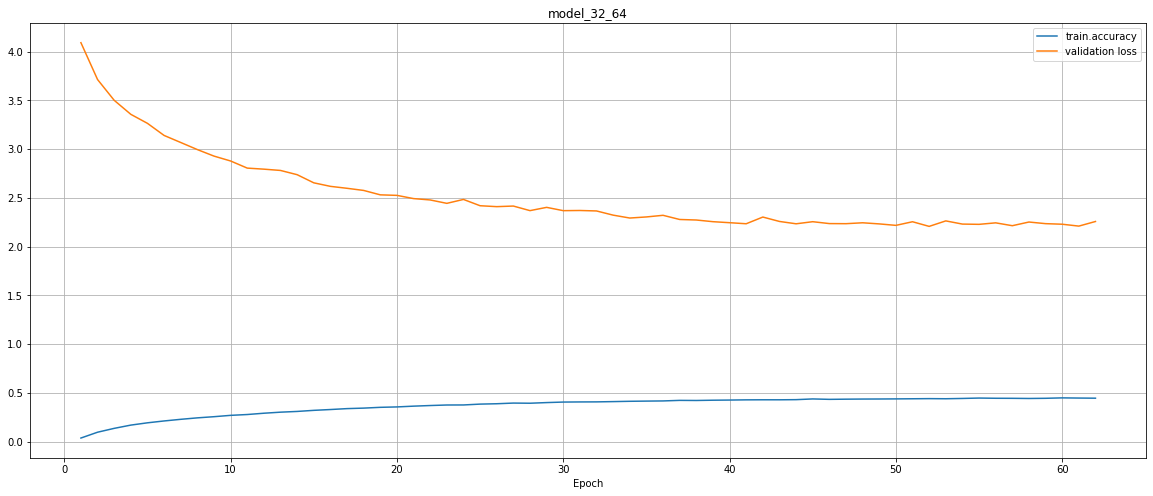

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('model_32_64')
plt.show()

- 64 / 128

In [22]:
model_64_128 = Sequential([
    Conv2D(64, (3,3), input_shape=(32, 32, 3), padding='same',activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model_64_128.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

In [23]:
model_64_128.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_64_128_path = 'best-cifar10-v2.h5'
mc = ModelCheckpoint(model_64_128_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

hist2 = model_64_128.fit(X_train, Y_train, validation_split = 0.2,
                  epochs = 100, batch_size = 32,
                  callbacks=[mc, es])

Epoch 1/100
1245/1250 [============================>.] - ETA: 0s - loss: 4.2890 - accuracy: 0.0511
Epoch 1: val_loss improved from inf to 3.96890, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 13s 9ms/step - loss: 4.2882 - accuracy: 0.0512 - val_loss: 3.9689 - val_accuracy: 0.1128
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 3.8030 - accuracy: 0.1218
Epoch 2: val_loss improved from 3.96890 to 3.53459, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 11s 9ms/step - loss: 3.8029 - accuracy: 0.1218 - val_loss: 3.5346 - val_accuracy: 0.1763
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.5216 - accuracy: 0.1684
Epoch 3: val_loss improved from 3.53459 to 3.28126, saving model to best-cifar10-v2.h5
1250/1250 [==============================] - 11s 9ms/step - loss: 3.5212 - accuracy: 0.1685 - val_loss: 3.2813 - val_accuracy: 0.2192
Epoch 4/100
1247/1250 [=====================

In [25]:
best_model = load_model(model_64_128_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.9959 - accuracy: 0.4862


[1.9959417581558228, 0.4862000048160553]

In [30]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2) + 1)

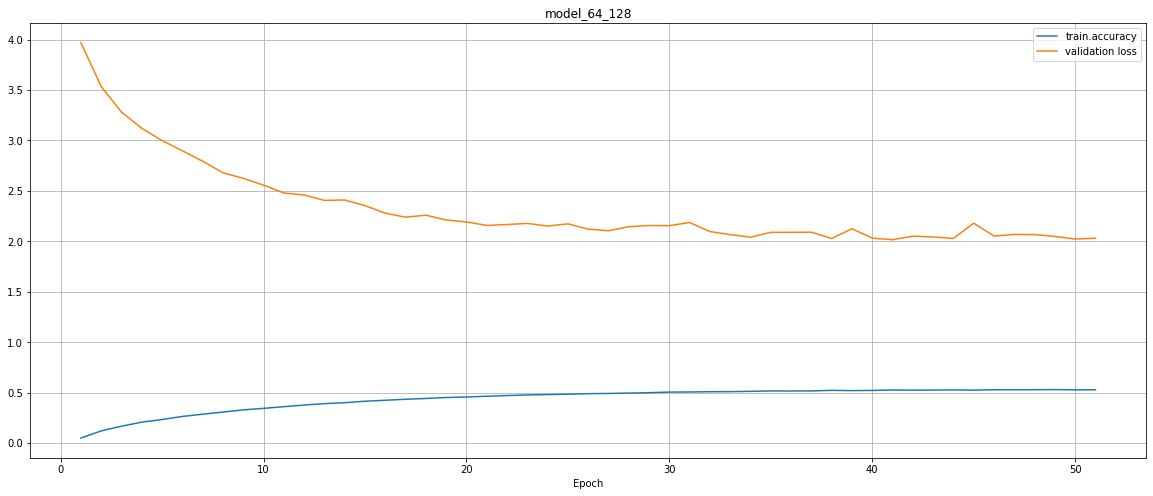

In [31]:
plt.figure(figsize=(20, 8))
plt.plot(xs2, y_acc2, label='train.accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('model_64_128')
plt.show()

- 32 / 128

In [32]:
model_32_128 = Sequential([
    Conv2D(64, (3,3), input_shape=(32, 32, 3), padding='same',activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model_32_128.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 128)       147584    
                                                      

In [33]:
model_32_128.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_32_128_path = 'best-cifar10-v3.h5'
mc = ModelCheckpoint(model_32_128_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

hist3 = model_32_128.fit(X_train, Y_train, validation_split = 0.2,
                  epochs = 100, batch_size = 32,
                  callbacks=[mc, es])

Epoch 1/100
1247/1250 [============================>.] - ETA: 0s - loss: 4.2914 - accuracy: 0.0479
Epoch 1: val_loss improved from inf to 3.93842, saving model to best-cifar10-v3.h5
1250/1250 [==============================] - 13s 9ms/step - loss: 4.2911 - accuracy: 0.0481 - val_loss: 3.9384 - val_accuracy: 0.1161
Epoch 2/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.8005 - accuracy: 0.1193
Epoch 2: val_loss improved from 3.93842 to 3.51129, saving model to best-cifar10-v3.h5
1250/1250 [==============================] - 11s 9ms/step - loss: 3.8004 - accuracy: 0.1194 - val_loss: 3.5113 - val_accuracy: 0.1839
Epoch 3/100
1245/1250 [============================>.] - ETA: 0s - loss: 3.5139 - accuracy: 0.1674
Epoch 3: val_loss improved from 3.51129 to 3.32008, saving model to best-cifar10-v3.h5
1250/1250 [==============================] - 11s 9ms/step - loss: 3.5138 - accuracy: 0.1675 - val_loss: 3.3201 - val_accuracy: 0.2112
Epoch 4/100
1244/1250 [=====================

In [34]:
best_model = load_model(model_32_128_path)
best_model.evaluate(X_test, Y_test)


313/313 [==============================] - 2s 4ms/step - loss: 2.0233 - accuracy: 0.4846


[2.0232608318328857, 0.4846000075340271]

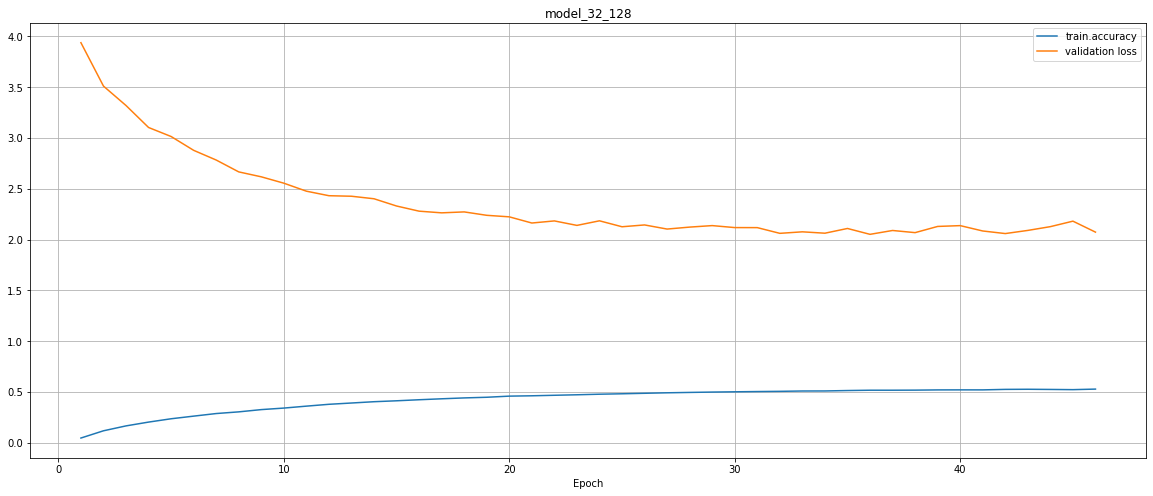

In [35]:
y_acc3 = hist3.history['accuracy']
y_vloss3 = hist3.history['val_loss']
xs3 = np.arange(1, len(y_acc3) + 1)

plt.figure(figsize=(20, 8))
plt.plot(xs3, y_acc3, label='train.accuracy')
plt.plot(xs3, y_vloss3, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('model_32_128')
plt.show()

- 128 / 256

In [38]:
model_128_256 = Sequential([
    Conv2D(128, (3,3), input_shape=(32, 32, 3), padding='same',activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model_128_256.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 128)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 15, 256)       295168    
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 256)       590080    
                                                      

In [39]:
model_128_256.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_128_256_path = 'best-cifar10-v4.h5'
mc = ModelCheckpoint(model_128_256_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

hist4 = model_128_256.fit(X_train, Y_train, validation_split = 0.2,
                  epochs = 100, batch_size = 32,
                  callbacks=[mc, es])

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 4.2306 - accuracy: 0.0601
Epoch 1: val_loss improved from inf to 3.82893, saving model to best-cifar10-v4.h5
1250/1250 [==============================] - 22s 17ms/step - loss: 4.2303 - accuracy: 0.0601 - val_loss: 3.8289 - val_accuracy: 0.1316
Epoch 2/100
1249/1250 [============================>.] - ETA: 0s - loss: 3.6673 - accuracy: 0.1453
Epoch 2: val_loss improved from 3.82893 to 3.32174, saving model to best-cifar10-v4.h5
1250/1250 [==============================] - 22s 17ms/step - loss: 3.6673 - accuracy: 0.1452 - val_loss: 3.3217 - val_accuracy: 0.2101
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 3.3387 - accuracy: 0.2025
Epoch 3: val_loss improved from 3.32174 to 3.08515, saving model to best-cifar10-v4.h5
1250/1250 [==============================] - 21s 17ms/step - loss: 3.3386 - accuracy: 0.2025 - val_loss: 3.0852 - val_accuracy: 0.2588
Epoch 4/100
1249/1250 [==================

In [40]:
best_model = load_model(model_128_256_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.9647 - accuracy: 0.4963


[1.96467924118042, 0.49630001187324524]

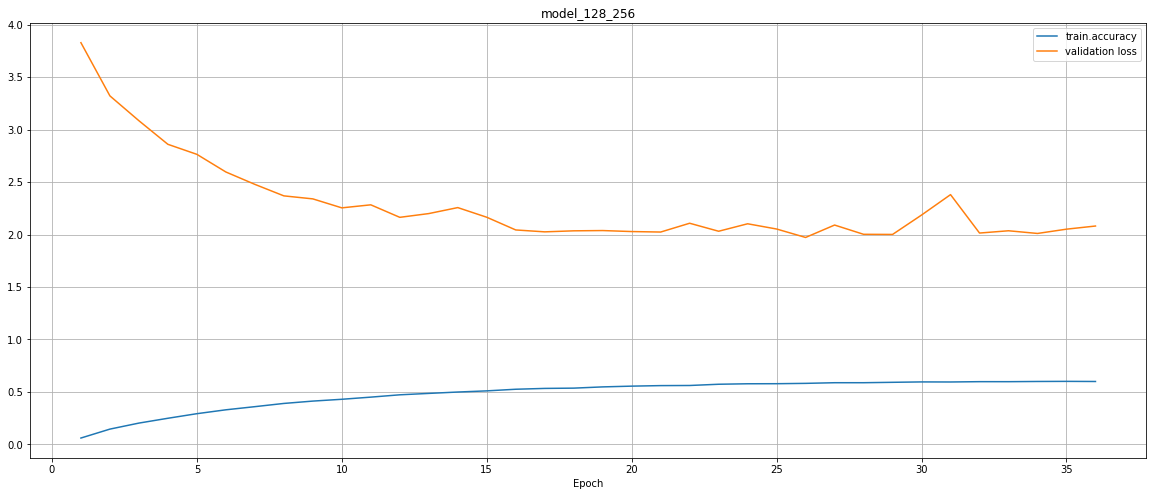

In [43]:
y_acc4 = hist4.history['accuracy']
y_vloss4 = hist4.history['val_loss']
xs4 = np.arange(1, len(y_acc4) + 1)

plt.figure(figsize=(20, 8))
plt.plot(xs4, y_acc4, label='train.accuracy')
plt.plot(xs4, y_vloss4, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('model_128_256')
plt.show()

- 64/128/256

In [55]:
model_all = Sequential([
    Conv2D(64, (3,3), input_shape=(32, 32, 3), padding='same',activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),
    # Conv2D(128, (3,3), padding='same', activation='relu'),
    # Conv2D(128, (3,3), activation='relu'),
    # MaxPooling2D(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model_all.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_99 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_100 (Conv2D)         (None, 15, 15, 128)       73856     
                                                                 
 conv2d_101 (Conv2D)         (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                

In [56]:
model_all.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_all_path = 'best-cifar10-v5.h5'
mc = ModelCheckpoint(model_all_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

hist5 = model_all.fit(X_train, Y_train, validation_split = 0.2,
                  epochs = 100, batch_size = 32,
                  callbacks=[mc, es])

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 4.3797 - accuracy: 0.0323
Epoch 1: val_loss improved from inf to 4.16788, saving model to best-cifar10-v5.h5
1250/1250 [==============================] - 13s 10ms/step - loss: 4.3795 - accuracy: 0.0322 - val_loss: 4.1679 - val_accuracy: 0.0608
Epoch 2/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.9742 - accuracy: 0.0877
Epoch 2: val_loss improved from 4.16788 to 3.68969, saving model to best-cifar10-v5.h5
1250/1250 [==============================] - 12s 10ms/step - loss: 3.9741 - accuracy: 0.0877 - val_loss: 3.6897 - val_accuracy: 0.1406
Epoch 3/100
1246/1250 [============================>.] - ETA: 0s - loss: 3.6956 - accuracy: 0.1299
Epoch 3: val_loss improved from 3.68969 to 3.53610, saving model to best-cifar10-v5.h5
1250/1250 [==============================] - 12s 10ms/step - loss: 3.6951 - accuracy: 0.1300 - val_loss: 3.5361 - val_accuracy: 0.1662
Epoch 4/100
1247/1250 [==================

In [58]:
best_model = load_model(model_all_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.9805 - accuracy: 0.4752


[1.9804943799972534, 0.47519999742507935]

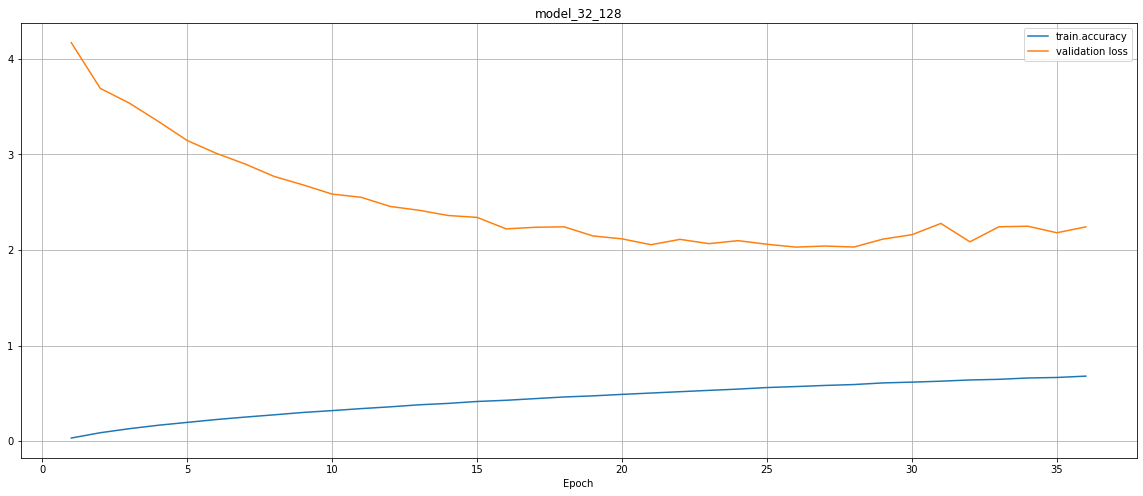

In [59]:
y_acc5 = hist5.history['accuracy']
y_vloss5 = hist5.history['val_loss']
xs5 = np.arange(1, len(y_acc5) + 1)

plt.figure(figsize=(20, 8))
plt.plot(xs5, y_acc5, label='train.accuracy')
plt.plot(xs5, y_vloss5, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('model_32_128')
plt.show()

- 256/512

In [60]:
model_256_512 = Sequential([
    Conv2D(256, (3,3), input_shape=(32, 32, 3), padding='same',activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model_256_512.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 32, 32, 256)       7168      
                                                                 
 conv2d_105 (Conv2D)         (None, 30, 30, 256)       590080    
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 15, 15, 256)      0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 15, 15, 256)       0         
                                                                 
 conv2d_106 (Conv2D)         (None, 15, 15, 512)       1180160   
                                                                 
 conv2d_107 (Conv2D)         (None, 13, 13, 512)       2359808   
                                                     

In [61]:
model_256_512.compile(
    optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_256_512_path = 'best-cifar10-v4.h6'
mc = ModelCheckpoint(model_256_512_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=10)

hist4 = model_256_512.fit(X_train, Y_train, validation_split = 0.2,
                  epochs = 100, batch_size = 32,
                  callbacks=[mc, es])

Epoch 1/100
1249/1250 [============================>.] - ETA: 0s - loss: 4.1509 - accuracy: 0.0707
Epoch 1: val_loss improved from inf to 3.67182, saving model to best-cifar10-v4.h6
INFO:tensorflow:Assets written to: best-cifar10-v4.h6/assets
1250/1250 [==============================] - 53s 41ms/step - loss: 4.1506 - accuracy: 0.0707 - val_loss: 3.6718 - val_accuracy: 0.1559
Epoch 2/100
1249/1250 [============================>.] - ETA: 0s - loss: 3.4971 - accuracy: 0.1753
Epoch 2: val_loss improved from 3.67182 to 3.11465, saving model to best-cifar10-v4.h6
INFO:tensorflow:Assets written to: best-cifar10-v4.h6/assets
1250/1250 [==============================] - 52s 42ms/step - loss: 3.4973 - accuracy: 0.1752 - val_loss: 3.1147 - val_accuracy: 0.2569
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 3.0882 - accuracy: 0.2504
Epoch 3: val_loss improved from 3.11465 to 2.77904, saving model to best-cifar10-v4.h6
INFO:tensorflow:Assets written to: best-cifar10-v4.h6/

In [62]:
best_model = load_model(model_256_512_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.9149 - accuracy: 0.5204


[1.9149316549301147, 0.5203999876976013]

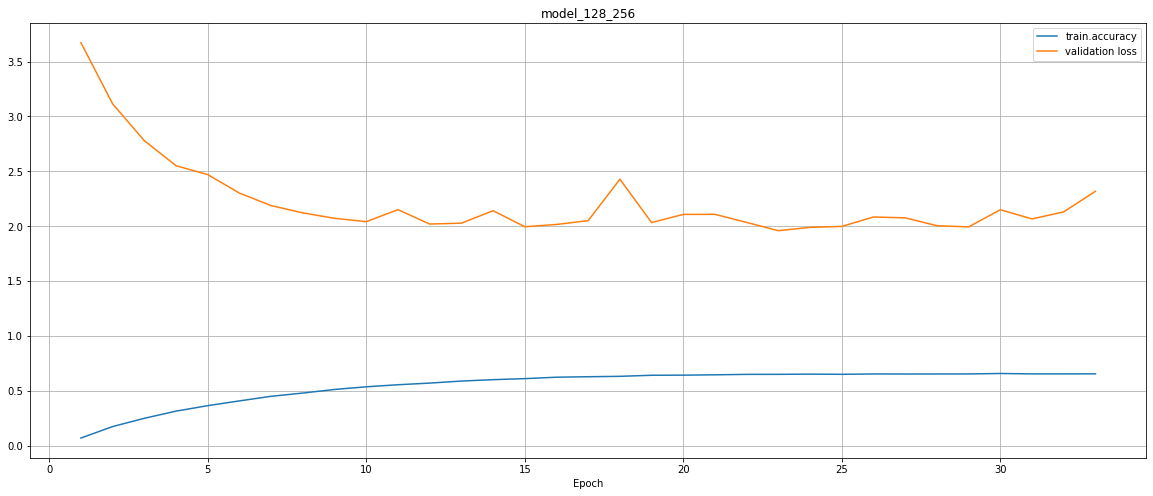

In [64]:
y_acc6 = hist4.history['accuracy']
y_vloss6 = hist4.history['val_loss']
xs6 = np.arange(1, len(y_acc6) + 1)

plt.figure(figsize=(20, 8))
plt.plot(xs6, y_acc6, label='train.accuracy')
plt.plot(xs6, y_vloss6, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('model_128_256')
plt.show()